[0.01221291608043442, 0.01767647051144644, 0.010709159206171671, 0.014992600354223009, 0.010074022075850361, 0.01477972712837421, 0.01230973891724806, 0.01049574058663752, 0.011394349439541927, 0.012921918115244551]
[1.4651776649746193, 1.2002083333333333, 0.6172899728997289, 1.5734653465346533, 0.5804597701149425, 1.6670090634441088, 0.7597014925373133, 1.0879283887468028, 1.1463049095607236, 1.4302981029810298]


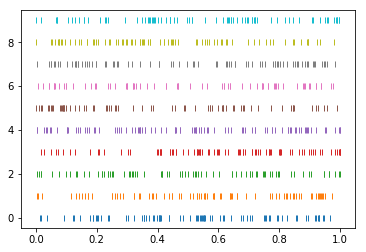

In [2]:
#######For homogeneous poisson process#######

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def plot_spikeraster(tt):
    # `tt` is a list of lists. Each element of `tt` is the spike train
    # for one neuron, i.e. a list of spike times for that neuron.
    for i, t in enumerate(tt):
        plt.plot(t, i*np.ones_like(t), '|')

def gen_spikes(time, rate):
    t_curr = 0
    spiketrain = []
    while t_curr < time:
        t_next = t_curr - np.log(np.random.rand(1))/rate
        if t_next <= time:
            spiketrain.append(t_next)
        t_curr = t_next
        
    return spiketrain

def coeff_var(spike):
    #Compute inter-spike interval
    inter_spike = []
    time_prev = 0
    for i in range(0,len(spike)):
        time_curr = spike[i]
        inter_spike.append(time_curr-time_prev)
        time_prev = time_curr
    #compute coefficient of variation
    std = np.square(np.std(inter_spike))
    mean = np.mean(inter_spike)
    coeff_var = std/mean
    return coeff_var

def fano_fact(spike, numBins, time, timeBin):  
    #generate bin centers
    binSize = time/numBins
    i = binSize/2 #the first bin center
    binCenters = []
    while i < time :
        binCenters.append(i)
        i = i + binSize
    
    spikesInBin_list = [] #list of number of spikes in each bin
    time_center = timeBin/2 #time from each bin center
    for j in range(0, len(binCenters)): #go through each bin and count how many spikes are in the bin
        time_min = binCenters[j] - time_center #minumum time of bin
        time_max = binCenters[j] + time_center #Mmaximum time of bin
        spikesInBin = 0 #number of spikes in specific bin
        for k in range(0, len(spike)):
            if spike[k] >= time_min and spike[k] <= time_max:
                spikesInBin = spikesInBin + 1        
        spikesInBin_list.append(spikesInBin)
    
    #compute the fano factr
    var = np.square(np.std(spikesInBin_list))
    mean = np.mean(spikesInBin_list)
    fanoFact = var/mean
    return fanoFact              
                    
    
#variables        
num = 10 #generate 10 1-second spike trains
time = 1 #seconds
rate = 75 #Hz = spikes/second

#for the fano factor
num_bins = 50
time_bin = 0.1

#generate spike train
tt = []
coeffs_var = []
fanoFact_list = []
for i in range(0, num):
    spike_curr = gen_spikes(time, rate)
    tt.append(spike_curr) 
    coeffs_var.append(coeff_var(spike_curr))
    fanoFact_list.append(fano_fact(spike_curr, num_bins, time, time_bin))


plot_spikeraster(tt)
print(coeffs_var)
print(fanoFact_list)

Text(0.5, 1.0, 'average number of spikes over time (bin size = 0.01)')

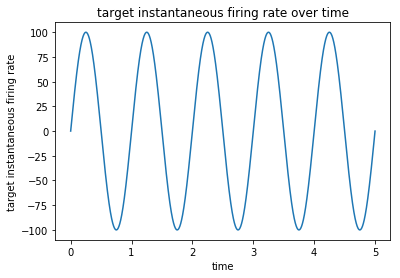

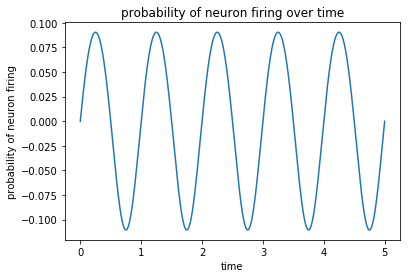

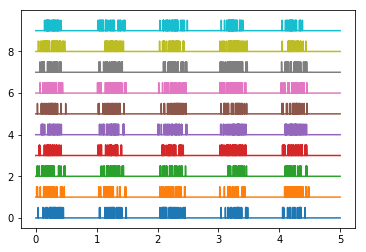

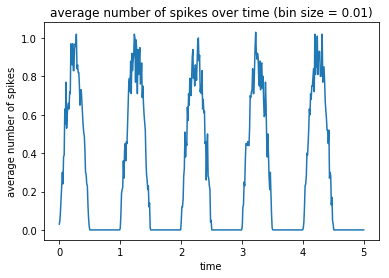

In [1]:
#######For inhomogeneous poisson process#########
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

num = 100
time = 5 #seconds
r_max = 100 #Hz
timeBin = 0.001 #seconds
num_bins = int(time/timeBin)

#for part a. target instantaneous firing rate, as given by sinusoidal function
#r(t) = r_max * sin(2*pi*t)
time_vector = np.linspace(0, 5, num_bins+1)
firingRate_vector = r_max*np.sin(2*np.pi*time_vector)
plt.figure(1)
plt.plot(time_vector, firingRate_vector)
plt.xlabel('time')
plt.ylabel('target instantaneous firing rate')
plt.title('target instantaneous firing rate over time')

#for part b. probability of neuron firing at each point in time
probability_vector = np.exp(-(firingRate_vector)*timeBin)*firingRate_vector*timeBin
plt.figure(2)
plt.plot(time_vector, probability_vector)
plt.xlabel('time')
plt.ylabel('probability of neuron firing')
plt.title('probability of neuron firing over time')

#for part c. the spike train of 10 neurons
def plot_spikeraster(t, ss, n=10):
    # `t`: the times corresponding to each time bin
    # `ss`: list of spike masks, where each element in `ss` is a boolean array
    # of the same length as `t`, indicating if there was a spike in that bin
    # or not.
    # `n`: the number of spike trains to plot

    for i, s in enumerate(ss[:n]):
        plt.plot(t, i + 0.5*s)

#There is is a spike if x_rand < r(t)*deltat
spike_list = []
for i in range(0, num):
    #initialize boolean array of spikes
    spikes = np.zeros(num_bins)
    for j in range(0, num_bins):
        if np.random.rand(1) < firingRate_vector[j]*timeBin:
            spikes[j] = 1
    spike_list.append(spikes)  

plt.figure(3)
plot_spikeraster(time_vector[0:num_bins], spike_list, 10)

#for part d. the average number of spikes across all neurons using bin size of 0.01
average = []

#pool together every 10 bins
spikesList_smooth = []

for i in range(0, num):
    spike_curr = spike_list[i]
    smooth_curr = []
    index = 0
    while index < num_bins:
        smooth_curr.append(np.sum(spike_curr[index:index+9]))
        index = index+10
    spikesList_smooth.append(smooth_curr)
#get mean of all 100 spike samples for each time
spikesList_smooth = np.matrix(spikesList_smooth)
smooth_mean = np.transpose(spikesList_smooth.mean(0))
plt.figure(4)
time_vector = np.linspace(0, 5, int(num_bins/10))
plt.plot(time_vector, smooth_mean)
plt.xlabel('time')
plt.ylabel('average number of spikes')
plt.title('average number of spikes over time (bin size = 0.01)')

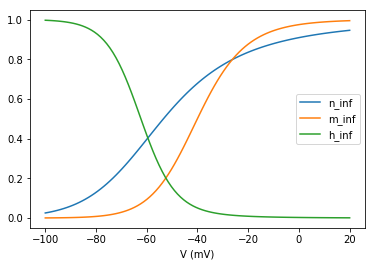

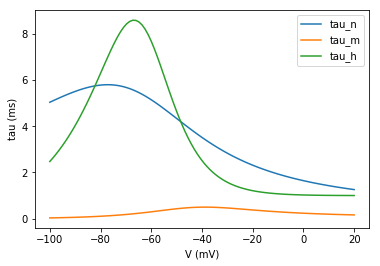

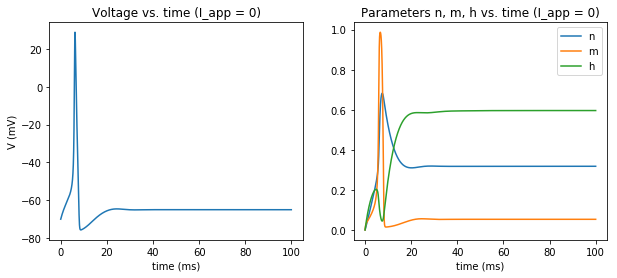

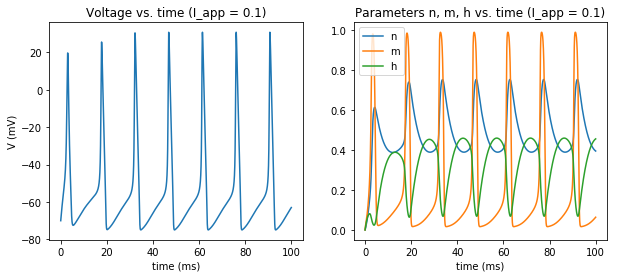

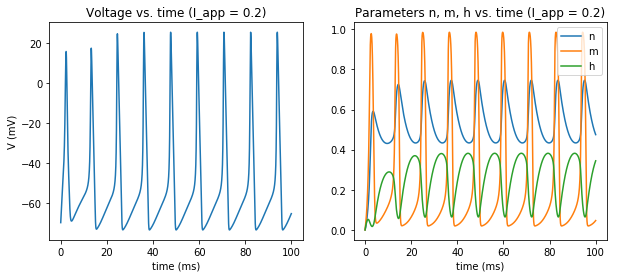

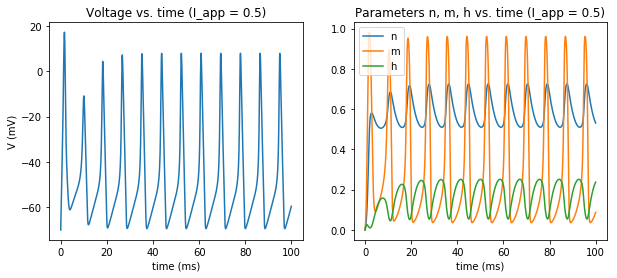

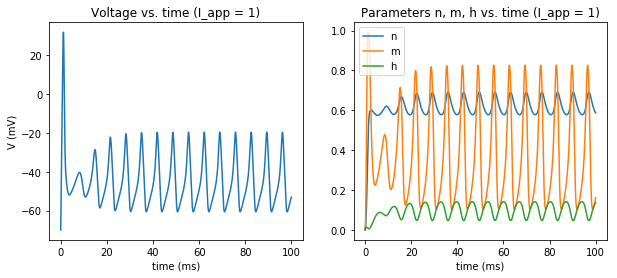

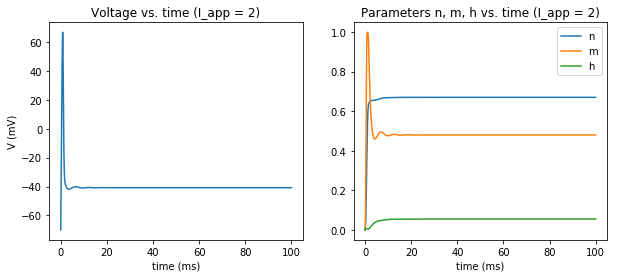

In [1]:
#######For Hodgkin Huxley model#########
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def alphabeta_n(V):
    alpha = 0.01*(V + 55) / (1 - np.exp(-0.1*(V + 55)))
    alpha = np.asarray(alpha)
    alpha[np.isnan(alpha)] = 0.1  # use l'Hopital's rule to find this value
    beta = 0.125 * np.exp(-0.0125*(V + 65))
    return alpha, beta

def alphabeta_m(V):
    alpha = (0.1*(V + 40))/(1-np.exp(-0.1*(V + 40)))
    alpha = np.asarray(alpha)
    alpha[np.isnan(alpha)] = 1 #use l'hopital's rule if indeterminate
    beta = 4*np.exp(-0.0556*(V + 65))
    return alpha, beta

def alphabeta_h(V):
    alpha = 0.07*np.exp(-0.05*(V + 65)) #never indeterminate
    beta = 1/(1 + np.exp(-0.1*(V+35))) #never indeterminate
    return alpha, beta

def tauinf(alpha, beta):
    inf = alpha/(alpha + beta)
    tau = 1/(alpha+  beta)
    return inf, tau

voltage_vector = np.linspace(-100, 20, 100)
#for n
alpha_n, beta_n = alphabeta_n(voltage_vector)
n_inf, tau_n = tauinf(alpha_n, beta_n)
#for m
alpha_m, beta_m = alphabeta_m(voltage_vector)
m_inf, tau_m = tauinf(alpha_m, beta_m)
#for h
alpha_h, beta_h = alphabeta_h(voltage_vector)
h_inf, tau_h = tauinf(alpha_h, beta_h)

plt.figure(1)
plt.plot(voltage_vector, n_inf)
plt.plot(voltage_vector, m_inf)
plt.plot(voltage_vector, h_inf)
plt.legend(['n_inf', 'm_inf', 'h_inf'])
plt.xlabel('V (mV)')
plt.figure(2)
plt.plot(voltage_vector, tau_n)
plt.plot(voltage_vector, tau_m)
plt.plot(voltage_vector, tau_h)
plt.legend(['tau_n', 'tau_m', 'tau_h'])
plt.xlabel('V (mV)')
plt.ylabel('tau (ms)')

#######question 4######
def HodgkinHux (I_app):
    dt = 0.01  # ms
    # specific membrane capacitance [uF / mm^2]
    c_m = 0.01
    # Nernst potentials [mV]
    E_K = -77
    E_Na = 50
    E_L = -54.387
    # conductances [mS / mm^2]
    g_L = 0.003
    g_K = 0.36
    g_Na = 1.2
    #initial values
    tot_time = 100 #run for 100 ms
    Vm = -70 #mV
    n = 0
    m = 0
    h = 0
    #to return
    Vm_list = [Vm]
    n_list = [n]
    m_list = [m]
    h_list = [h]
    time_list = [0]
    for i in range(0, int(100/0.01)): #have tot/step number of values
        #V' = dV/dt = (V2 - V1)/(deltat), solving, multiply RHS by deltat, and add v1
        Vm_2 = (1/c_m)*((-g_L*(Vm-E_L)-g_K*(n**4)*(Vm-E_K)-g_Na*(m**3)*h*(Vm-E_Na)) + I_app)*dt + Vm
        #get all alphabeta values
        alpha_n, beta_n = alphabeta_n(Vm)
        alpha_m, beta_m = alphabeta_m(Vm)
        alpha_h, beta_h = alphabeta_h(Vm)
        #n' = dn/dt = (n2 - n1)/deltat, solve same as above for all
        n_2 = (alpha_n*(1-n) - beta_n*n)*dt + n
        m_2 = (alpha_m*(1-m) - beta_m*m)*dt + m
        h_2 = (alpha_h*(1-h) - beta_h*h)*dt + h
        #update all values for next time step
        Vm = Vm_2
        n = n_2
        m = m_2
        h = h_2
        Vm_list.append(Vm)
        n_list.append(n)
        m_list.append(m)
        h_list.append(h)
        time_list.append(time_list[i]+dt)
    return Vm_list, n_list, m_list, h_list, time_list

def plot_HodgkinHux(Vm_list, n_list, m_list, h_list, time_list, I_app, fig_num):
    #Plotting V, and n, m, h
    plt.figure(fig_num, figsize=(10, 4))
    plt.subplot(1,2,1)
    plt.plot(time_list, Vm_list)
    plt.ylabel('V (mV)')
    plt.xlabel('time (ms)')
    plt.title('Voltage vs. time (I_app = '+ str(I_app) +')')
    plt.subplot(1,2,2)
    plt.plot(time_list, n_list)
    plt.plot(time_list, m_list)
    plt.plot(time_list, h_list)
    plt.legend(['n', 'm', 'h'])
    plt.xlabel('time (ms)')
    plt.title('Parameters n, m, h vs. time (I_app = '+ str(I_app)+')')

I_app = [0, 0.1, 0.2, 0.5, 1, 2]
fig_num = 3
for j in range(0, len(I_app)):
    Vm_list, n_list, m_list, h_list, time_list = HodgkinHux(I_app[j])
    plot_HodgkinHux(Vm_list, n_list, m_list, h_list, time_list, I_app[j], fig_num)
    fig_num = fig_num + 1

